A simple face recognition using SVM is implemented.

Importing the libraries and the datasets : The dataset used in this example is a preprocessed excerpt of the “Labeled Faces in the Wild”, aka LFW .

In [1]:
import matplotlib.pylab as pl
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

Loading data into munpy arrays

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=None)

In [8]:
lfw_people

{'DESCR': ".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones

In [3]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [4]:
X = lfw_people.data
n_features = X.shape[1]

In [5]:
X

array([[0.99477124, 0.99477124, 0.9986928 , ..., 0.38169935, 0.38039216,
        0.38039216],
       [0.16470589, 0.13333334, 0.12418301, ..., 0.47712418, 0.5803922 ,
        0.7267974 ],
       [0.36862746, 0.28235295, 0.2901961 , ..., 0.7163399 , 0.7176471 ,
        0.71503276],
       ...,
       [0.351634  , 0.35816994, 0.35555556, ..., 0.19869281, 0.16732027,
        0.14640523],
       [0.19869281, 0.20130719, 0.19084968, ..., 0.6627452 , 0.62222224,
        0.4771242 ],
       [0.12287582, 0.13071896, 0.10457516, ..., 0.18692811, 0.24705882,
        0.3882353 ]], dtype=float32)

In [9]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [12]:
print(y)
print(target_names)
print(n_classes)

[5 6 3 ... 5 3 5]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
7


In [13]:
print("Total dataset size:")
print("n_samples: %d", n_samples)
print("n_features: %d", n_features)
print("n_classes: %d", n_classes)

Total dataset size:
n_samples: %d 1288
n_features: %d 11750
n_classes: %d 7


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In our case, we have a total of 966 features in the training set X_train , and we will reduce them to 50 using PCA (dimensionality reduction).

In [15]:
n_components = 50
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

Now we will reshape our PCA components and define eigenfaces, which is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition.

In [16]:
eigenfaces = pca.components_.reshape((n_components, h, w))

we will use PCA’s transform on both X_train and X_test to reduce the dimensionality.

In [17]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**Training the svm Classifier**

We will use GridSearchCV, a library function that is an approach to hyperparameter tuning. It will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid, and return the best estimator in clf.best_estimator. The parameters are given in the param_grid

In [18]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)


Predictions :

In [21]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)
y_pred

Predicting the people names on the testing set


array([3, 3, 6, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 4, 3, 3, 3, 1, 3, 4, 1, 1,
       3, 3, 0, 1, 1, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 4, 3, 3, 3, 3, 3, 0, 3, 6, 2, 1, 3, 6, 3, 1, 1, 1, 4, 2, 4,
       6, 4, 1, 3, 4, 6, 3, 2, 3, 2, 1, 6, 6, 4, 3, 0, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 3, 2, 1, 3, 1, 1, 6, 6, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1,
       3, 1, 6, 4, 3, 3, 3, 4, 1, 3, 1, 3, 3, 0, 3, 4, 4, 3, 1, 3, 6, 6,
       6, 3, 4, 4, 3, 3, 1, 6, 2, 2, 5, 1, 3, 5, 1, 3, 1, 1, 1, 1, 1, 3,
       3, 3, 6, 0, 1, 3, 6, 5, 5, 1, 3, 1, 5, 1, 2, 3, 1, 1, 3, 1, 5, 3,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 6, 3, 3, 6,
       3, 3, 5, 2, 1, 2, 3, 3, 6, 2, 6, 2, 1, 5, 3, 3, 3, 3, 3, 0, 0, 1,
       3, 3, 1, 1, 6, 3, 3, 3, 1, 3, 3, 3, 1, 0, 3, 1, 6, 3, 3, 3, 3, 5,
       2, 6, 3, 0, 3, 3, 3, 4, 4, 3, 3, 0, 3, 4, 3, 1, 6, 0, 3, 3, 3, 1,
       3, 4, 1, 1, 3, 6, 1, 1, 3, 3, 4, 3, 6, 3, 3, 3, 1, 1, 3, 3, 1, 1,
       3, 3, 3, 4, 2, 3, 5, 3, 3, 0, 4, 2, 3, 4, 3,

In [22]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.77      0.77        13
     Colin Powell       0.79      0.90      0.84        60
  Donald Rumsfeld       0.62      0.56      0.59        27
    George W Bush       0.86      0.90      0.88       146
Gerhard Schroeder       0.71      0.68      0.69        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.82      0.64      0.72        36

         accuracy                           0.81       322
        macro avg       0.77      0.72      0.74       322
     weighted avg       0.81      0.81      0.80       322



Evaluating using confusion matrix




In [23]:
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[ 10   1   2   0   0   0   0]
 [  0  54   1   4   0   0   1]
 [  1   3  15   7   1   0   0]
 [  0   7   4 132   1   1   1]
 [  0   0   2   3  17   1   2]
 [  0   2   0   1   2   9   1]
 [  2   1   0   7   3   0  23]]


In [24]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

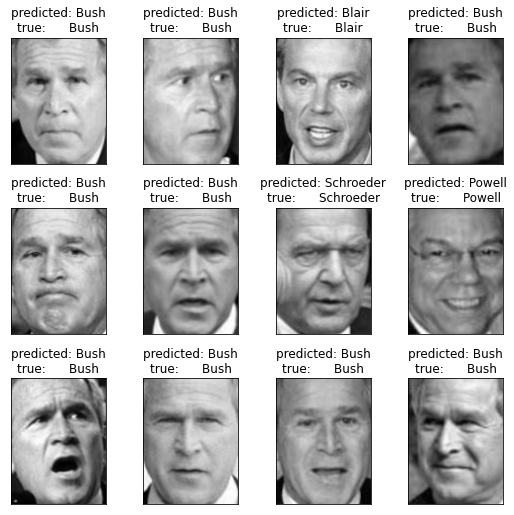

In [25]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

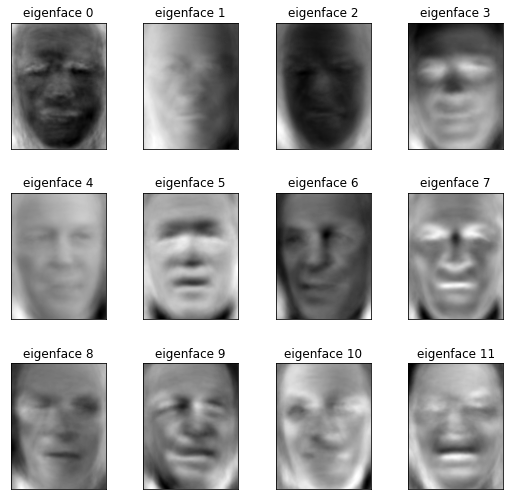

In [26]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8074534161490683
